## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = '.\Instructions\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = '.\Instructions\Pymaceuticals\data\Study_results.csv'
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path) 
# Combine the data into a single datase
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
# Display the data table for preview
print('\nRecords after merge:')
merged_df


Records after merge:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice.
numMouse = merged_df['Mouse ID'].count()
numMouse

1893

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupRows_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_rows = merged_df[merged_df.duplicated(['Mouse ID'])]
all_dup_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_merged_df = merged_df.drop_duplicates('Mouse ID')

In [18]:
# Checking the number of mice in the clean DataFrame.
print('Number of Mice after clean: ' + str(cleaned_merged_df['Mouse ID'].count()))

Number of Mice after clean: 249


## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdDev = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Std Dev': stdDev, 'SEM': sem})
summary_df


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

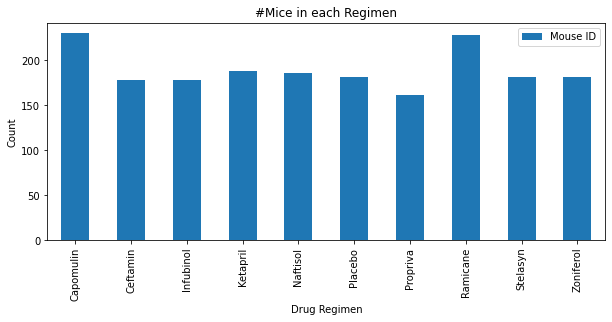

<Figure size 432x288 with 0 Axes>

In [38]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_df = pd.DataFrame(merged_df.groupby(['Drug Regimen']).count()).reset_index()
drugs_df = drug_df[['Drug Regimen', 'Mouse ID']]
drugs_df = drugs_df.set_index('Drug Regimen')
drugs_df.plot(kind='bar', figsize=(10,4))
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('#Mice in each Regimen')
plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

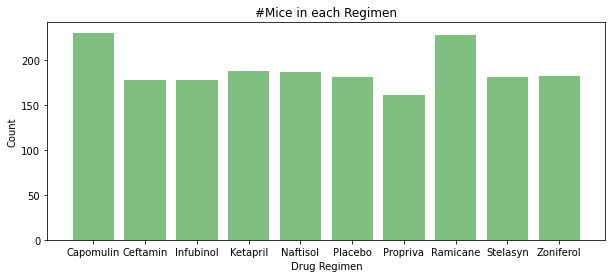

In [39]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_ls = summary_df.index.tolist()
drugCount_ls = (merged_df.groupby(['Drug Regimen'])['Age_months'].count()).tolist()
x_axis = np.arange(len(drugCount_ls))
x_axis = drug_ls
plt.figure(figsize=(10,4))
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('#Mice in each Regimen')
plt.bar(x_axis, drugCount_ls, color='g', alpha=0.5, align='center')


Text(0, 0.5, '')

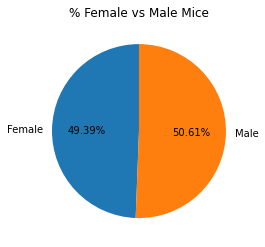

In [5]:
gender_df = pd.DataFrame(merged_df.groupby(["Sex"]).count()).reset_index()
gender_df=gender_df[['Sex','Mouse ID']]
plt.figure(figsize=(10,4))
axis = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = 'Mouse ID', ax=axis, autopct='%1.2f%%',
              startangle=90,labels=gender_df['Sex'], legend=False)
plt.title('% Female vs Male Mice')
plt.ylabel('')

([<matplotlib.patches.Wedge at 0x2786bf5e790>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Females'),
  Text(1.0997996703027118, -0.02099250347258625, 'Males')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.39%'),
  Text(0.5998907292560246, -0.011450456439592499, '50.61%')])

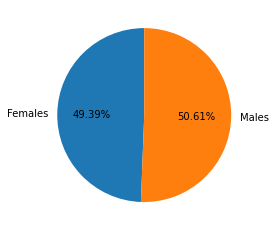

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderCount = (merged_df.groupby(['Sex'])['Age_months'].count()).tolist()
labels = ['Females', 'Males']
plt.pie(genderCount, autopct='%1.2f%%', startangle=90, labels=labels)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
